# Hypothesis testing with Python

## **Background**

A small business requested insights about how different marketing promotion types affect sales. We address that request in our previous project using multiple linear regression. We will now use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, we will communicate our results to stakeholders. 

In our dataset, each row corresponds to an independent marketing promotion, where the business uses TV, social media, radio, and influencer promotions to increase sales.  
Stakeholders would now like to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable us to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

Analysis of variance (ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

## **Imports** 


In [1]:
# Importing libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Loading the data.

data = pd.read_csv('~/Documents/data_science/projects/mul_lin_reg/marketing_sales_data.csv')

# Displaying the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [3]:
# Checking unquie values for TV and Influencer features

print('TV categories: ', data['TV'].unique())
print('Influencer categories: ', data['Influencer'].unique())

TV categories:  ['Low' 'High' 'Medium']
Influencer categories:  ['Micro' 'Mega' 'Nano' 'Macro']


## **Exploratory Data Analysis** 


We will use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

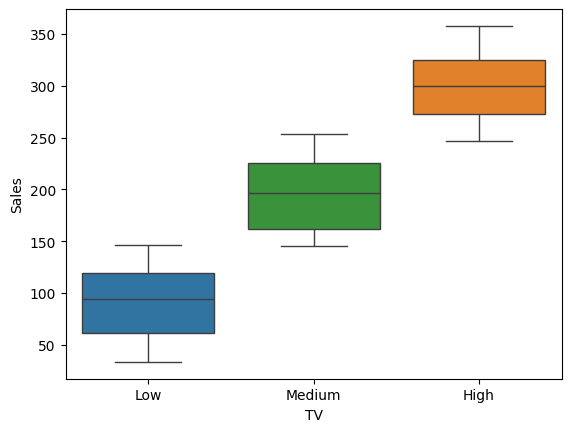

In [12]:
# Creating a boxplot with TV and Sales.

sns.boxplot(x = "TV", y = "Sales", data = data, order=["Low", "Medium", "High"], hue="TV");

There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

Now, we will use another boxplot to determine how `Sales` vary based on the `Influencer` size category.

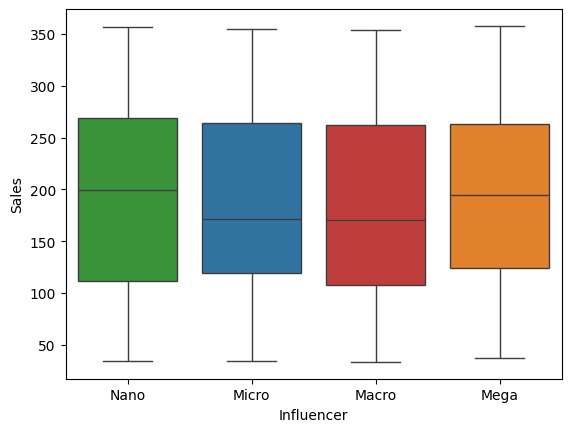

In [ ]:
# Creating a boxplot with Influencer and Sales.

sns.boxplot(x = "Influencer", y = "Sales", data = data, order=["Nano", "Micro", "Macro", "Mega"], hue="Influencer");

There is some variation in `Sales` across the `Influencer` groups, but it may not be significant.

In [14]:
# Dropping rows that contain missing data and updating the DataFrame.

data = data.dropna(axis=0)


# Confirming the data contain no missing values.

data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## **Building The Model** 

In [15]:
# Defining the OLS formula.

ols_formula = 'Sales ~ C(TV)'

# Creating an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fitting the model.

model = OLS.fit()

# Saving the results summary.

model_results = model.summary()

# Displaying the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          1.38e-253
Time:                        22:34:49   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `TV` was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

### Checking model assumptions

Because our model does not have any continuous independent variables, the linearity assumption is not required. 

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, we will verify that the normality assumption is upheld for the model.

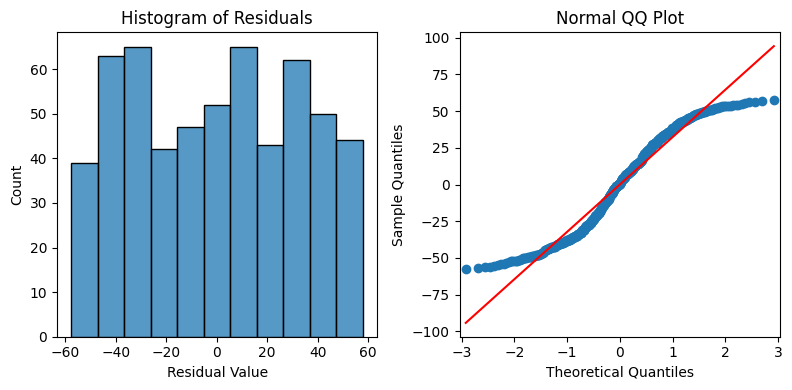

In [16]:
# Calculating the residuals.

residuals = model.resid

# Creating a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Creating a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Setting the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Setting the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Creating a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Setting the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Using matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Showing the plot.
plt.show()

There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior. 

However, for this project we will continue assuming the normality assumption is met.

We will then verify the constant variance (homoscedasticity) assumption is met for this model.

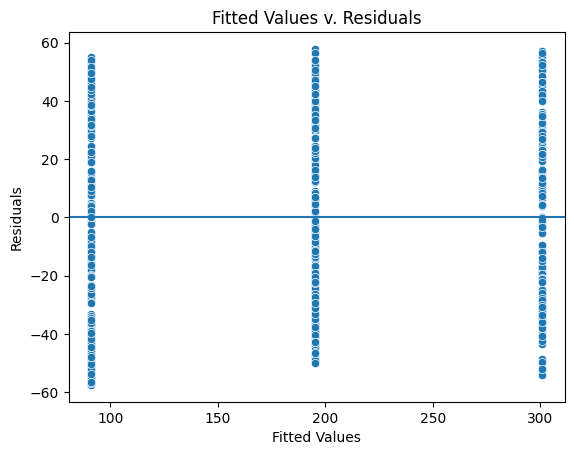

In [17]:
# Creating a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Setting the x axis label
fig.set_xlabel("Fitted Values")

# Setting the y axis label
fig.set_ylabel("Residuals")

# Setting the title
fig.set_title("Fitted Values v. Residuals")

# Adding a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Showing the plot
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## **Evaluating The Results** 

In [ ]:
# Displaying the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        21:45:48   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` as the independent variable results in a linear regression model with $R^{2} = 0.874$. In other words, the model explains $87.4\%$ of the variation in `Sales`. This makes the model an effective predictor of `Sales`. 

The default `TV` category for the model is `High`, because there are coefficients for the other two `TV` categories, `Medium` and `Low`. According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category. For example, the model predicts that a `Low` `TV` promotion would be 208.813 (in millions of dollars) lower in `Sales` on average than a `High` `TV` promotion.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a $95\%$ chance the interval $[-215.353,-202.274]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

Given how accurate `TV` was as a predictor, the model could be improved with a more granular view of the `TV` promotions, such as additional categories or the actual `TV` promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy. 

### Performing a one-way ANOVA test

With the model fit, we will run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [18]:
# Creating an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.016116e+06,2.0,1917.749265,1.383230e-253
Residual,5.957948e+05,569.0,NaN,NaN


The null hypothesis is that there is no difference in `Sales` based on the `TV` promotion budget.

The alternative hypothesis is that there is a difference in `Sales` based on the `TV` promotion budget.

The F-test statistic is 1971.46 and the p-value is $1.38 * 10^{-253}$ (i.e., very small). Because the p-value is less than 0.05, we reject the null hypothesis that there is no difference in `Sales` based on the `TV` promotion budget.

The results of the one-way ANOVA test indicate that we can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in `Sales` among `TV` groups.

### Performing an ANOVA post hoc test

Since we have significant results from the one-way ANOVA test, we can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Running the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [19]:
# Performing the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Displaying the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True


The first row, which compares the `High` and `Low` `TV` groups, indicates that we can reject the null hypothesis that there is no significant difference between the `Sales` of these two groups.

We can also reject the null hypotheses for the two other pairwise comparisons that compare `High` to `Medium` and `Low` to `Medium`.

The post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

The results were that `Sales` is not the same between any pair of `TV` groups. 

## **Considerations**

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.


Specifically, following are estimates for the difference between the mean sales resulting from different pairs of TV promotions, as determined by the Tukey's HSD test:

* Estimated difference between the mean sales resulting from High and Low TV promotions: \\$208.81 million (with 95% confidence that the exact value for this difference is between 202.27 and 215.35 million dollars). 
* Estimated difference between the mean sales resulting from High and Medium TV promotions: \\$101.51 million (with 95% confidence that the exact value for this difference is between 94.98 and 108.04 million dollars).
* difference between the mean sales resulting from Medium and Low TV promotions: \\$104.37 million (with 95\% confidence that the exact value for this difference is between 96.83 and 111.92 million dollars).

The linear regression model estimating `Sales` from `TV` had an R-squared of $0.874, making it a fairly accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`. 

The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test. 
